<a href="https://colab.research.google.com/github/kay-kay-t/CodingDojo/blob/main/02_KMeans_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Loading data
df = pd.read_csv('/content/drive/MyDrive/Data/cust_seg.csv', index_col=[1])
df.head()

,Unnamed: 0,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,,
1,0,41,2,6,19,0.124,1.073,0.0,6.3
2,1,47,1,26,100,4.582,8.218,0.0,12.8
3,2,33,2,10,57,6.111,5.802,1.0,20.9
4,3,29,2,4,19,0.681,0.516,0.0,6.3
5,4,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df.drop(columns='Unnamed: 0',  inplace=True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
 8   cluster          850 non-null    int32  
dtypes: float64(4), int32(1), int64(4)
memory usage: 63.1 KB


Trying to group customers using values from col Age & Education.

In [ ]:
# define the columns we want to work with
x = df.loc[:, ['Age', 'Edu']].values

In [ ]:
# scale the data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

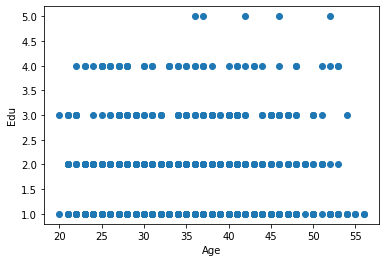

In [ ]:
# Visualize data
plt.scatter(df['Age'], df['Edu'])
plt.xlabel('Age')
plt.ylabel('Edu');

I guess there could be 5 clusters

In [ ]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(scaled_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df['cluster'] = kmeans.labels_

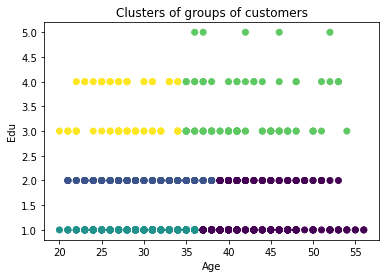

In [ ]:
# Visualize the clusters
plt.scatter(df['Age'], df['Edu'], c = df['cluster'])
plt.xlabel('Age')
plt.ylabel('Edu')
plt.title('Clusters of groups of customers');

That is not really what I was expecting to see...

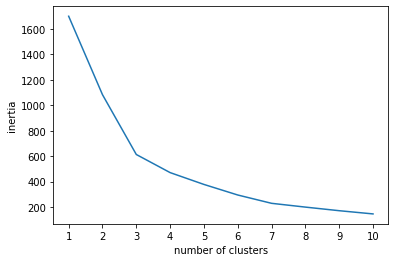

In [ ]:
# Lets try finding better k 
ks = range(1, 11)  
inertias = []		

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_x)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()  

So it seams like it should work better with 3 clusters.


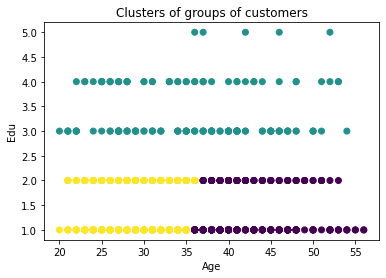

In [ ]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_x)

df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['Age'], df['Edu'], c = df['cluster'])
plt.xlabel('Age')
plt.ylabel('Edu')
plt.title('Clusters of groups of customers');

Ok, those t5wo colums are not the good ones to use trying to group people...

Trying to group customers using values from col Years Employed & Income.

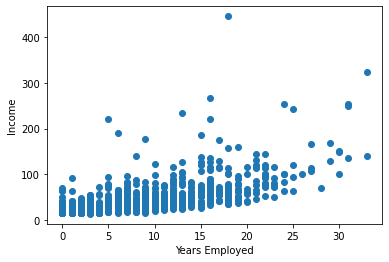

In [ ]:
# define the columns we want to work with
x = df.loc[:, ['Years Employed', 'Income']].values

# scale the data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

# Visualize data
plt.scatter(df['Years Employed'], df['Income'])
plt.xlabel('Years Employed')
plt.ylabel('Income');

Lets try also Income and Card Debt 

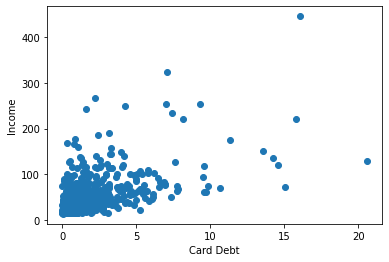

In [ ]:
# define the columns we want to work with
x = df.loc[:, ['Card Debt', 'Income']].values

# scale the data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

# Visualize data
plt.scatter(df['Card Debt'], df['Income'])
plt.xlabel('Card Debt')
plt.ylabel('Income');

Actually lets use heatmap to see which values are more correlated

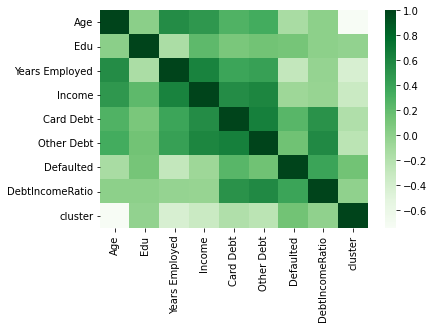

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens')

Per heatmap above we see that Age and Years Employed are more correlated or OtherDebt & DebtIncomeRatio. We can try clustering those 

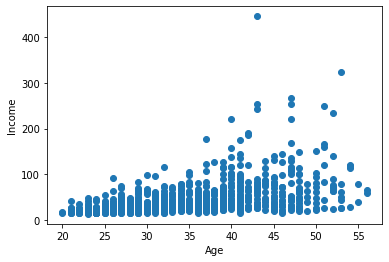

In [ ]:
# define the columns we want to work with
x = df.loc[:, ['Age', 'Income']].values

# scale the data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

# Visualize data
plt.scatter(df['Age'], df['Income'])
plt.xlabel('Age')
plt.ylabel('Income');

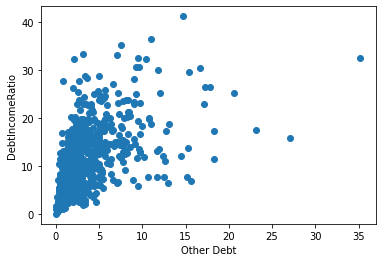

In [ ]:
# define the columns we want to work with
x = df.loc[:, ['Other Debt', 'DebtIncomeRatio']].values

# scale the data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

# Visualize data
plt.scatter(df['Other Debt'], df['DebtIncomeRatio'])
plt.xlabel('Other Debt')
plt.ylabel('DebtIncomeRatio');

Out of those different plots, we can try clustering 'Card Debt'and 'Income' or 'Other Debt' & 'DebtIncomeRatio'

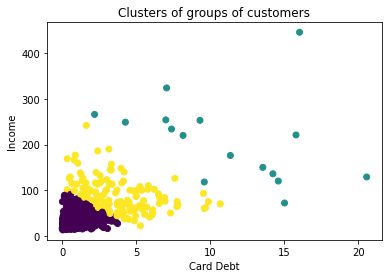

In [ ]:
# 'Card Debt'and 'Income'
# define the columns we want to work with
x1 = df.loc[:, ['Card Debt', 'Income']].values

# scale the data
scaler = StandardScaler()
scaled_x1 = scaler.fit_transform(x1)

# Instantiate KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_x1)

df['cluster1'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['Card Debt'], df['Income'], c = df['cluster1'])
plt.xlabel('Card Debt')
plt.ylabel('Income')
plt.title('Clusters of groups of customers');

So that is how looks clustering by 'Card Debt'and 'Income' with 3 clusters.

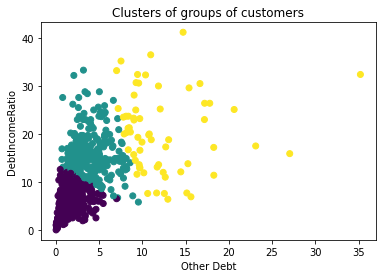

In [ ]:
#  'Other Debt' & 'DebtIncomeRatio'
# define the columns we want to work with
x2 = df.loc[:, [ 'Other Debt', 'DebtIncomeRatio']].values

# scale the data
scaler = StandardScaler()
scaled_x2 = scaler.fit_transform(x2)

# Instantiate KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_x2)

df['cluster2'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['Other Debt'], df['DebtIncomeRatio'], c = df['cluster2'])
plt.xlabel('Other Debt')
plt.ylabel('DebtIncomeRatio')
plt.title('Clusters of groups of customers');

That is how clustering by 'Other Debt' & 'DebtIncomeRatio' with 3 clusters looks.